In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# read in the csv data into a pandas data frame and set the date as the index
df = pd.read_csv('JaipurFinalCleanData.csv').set_index('date')

# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,676.0,26.053254,6.208964,10.00,20.0000,28.000,30.000,38.00
maxtempm,676.0,32.523669,5.987966,18.00,28.0000,33.000,37.000,46.00
mintempm,676.0,19.630178,6.825827,3.00,13.0000,22.000,25.000,32.00
meantempm_1,676.0,26.066568,6.218491,10.00,20.0000,28.000,30.000,38.00
meantempm_2,676.0,26.081361,6.230216,10.00,20.0000,28.000,30.000,38.00
meantempm_3,676.0,26.093195,6.237655,10.00,20.0000,28.000,30.000,38.00
meandewptm_1,676.0,11.995562,8.731127,-10.00,5.0000,10.000,21.000,26.00
meandewptm_2,676.0,11.995562,8.731127,-10.00,5.0000,10.000,21.000,26.00
meandewptm_3,676.0,11.989645,8.738584,-10.00,5.0000,10.000,21.000,26.00
meanpressurem_1,676.0,1009.499911,6.481713,997.63,1003.6975,1008.830,1015.525,1023.43


In [3]:
# execute the info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 2016-05-04 to 2018-03-11
Data columns (total 39 columns):
meantempm          676 non-null int64
maxtempm           676 non-null int64
mintempm           676 non-null int64
meantempm_1        676 non-null float64
meantempm_2        676 non-null float64
meantempm_3        676 non-null float64
meandewptm_1       676 non-null float64
meandewptm_2       676 non-null float64
meandewptm_3       676 non-null float64
meanpressurem_1    676 non-null float64
meanpressurem_2    676 non-null float64
meanpressurem_3    676 non-null float64
maxhumidity_1      676 non-null float64
maxhumidity_2      676 non-null float64
maxhumidity_3      676 non-null float64
minhumidity_1      676 non-null float64
minhumidity_2      676 non-null float64
minhumidity_3      676 non-null float64
maxtempm_1         676 non-null float64
maxtempm_2         676 non-null float64
maxtempm_3         676 non-null float64
mintempm_1         676 non-null float64
mintempm_2

In [4]:
# First drop the maxtempm and mintempm from the dataframe
df = df.drop(['mintempm', 'maxtempm'], axis=1)

# X will be a pandas dataframe of all columns except meantempm
X = df[[col for col in df.columns if col != 'meantempm']]

# y will be a pandas series of the meantempm
y = df['meantempm']

In [5]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [7]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   540, Training features   36
Validation instances 68, Validation features 36
Testing instances    68, Testing features    36


In [8]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [9]:
tf.VERSION #to check it has the latest version over 1.21 if not then install with conda update -f -c conda-forge tensorflow

'1.8.0'

In [10]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C6FBE53C50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [11]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=260): # 260 is used as we have approx 570 dataset for training
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [15]:
evaluations = []
STEPS = 260
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 995386.44, step = 0
INFO:tensorflow:global_step/sec: 85.6213
INFO:tensorflow:loss = 17667.512, step = 100 (1.170 sec)
INFO:tensorflow:global_step/sec: 85.4407
INFO:tensorflow:loss = 11902.69, step = 200 (1.170 sec)
INFO:tensorflow:Saving checkpoints for 260 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10652.933.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-04:56:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-260
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflo

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-04:56:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-07-04:56:31
INFO:tensorflow:Saving dict for global step 1300: average_loss = 8.579271, global_step = 1300, loss = 583.39044
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1301 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1766.8708, step = 1300
INFO:tensorflow:global_step/sec: 82.3146
INFO:tensorflow:loss = 1794.772, step = 

INFO:tensorflow:Loss for final step: 1280.2817.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-04:57:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-04-07-04:57:05
INFO:tensorflow:Saving dict for global step 2600: average_loss = 7.3567324, global_step = 2600, loss = 500.2578
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-04:57:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-07-04:57:07
INFO:tensorflow:Saving dict for global step 2

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3640
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3641 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1395.4652, step = 3640
INFO:tensorflow:global_step/sec: 78.7643
INFO:tensorflow:loss = 1114.8064, step = 3740 (1.272 sec)
INFO:tensorflow:global_step/sec: 88.8845
INFO:tensorflow:loss = 1325.1136, step = 3840 (1.126 sec)
INFO:tensorflow:Saving checkpoints for 3900 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1224.6906.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-04:57:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:F

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-04:58:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4940
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-07-04:58:14
INFO:tensorflow:Saving dict for global step 4940: average_loss = 6.6648674, global_step = 4940, loss = 453.21097
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4940
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4941 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1028.8987, step = 4940
INFO:tensorflow:global_step/sec: 82.0142
INFO:tensorflow:loss = 1141.9016, step 

INFO:tensorflow:Loss for final step: 1030.6019.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-04:58:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-6240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-04-07-04:58:49
INFO:tensorflow:Saving dict for global step 6240: average_loss = 6.326471, global_step = 6240, loss = 430.2
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-04:58:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-6240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-07-04:58:50
INFO:tensorflow:Saving dict for global step 6240:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 7281 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 960.9752, step = 7280
INFO:tensorflow:global_step/sec: 74.5138
INFO:tensorflow:loss = 1050.9192, step = 7380 (1.347 sec)
INFO:tensorflow:global_step/sec: 84.8252
INFO:tensorflow:loss = 1023.6056, step = 7480 (1.176 sec)
INFO:tensorflow:Saving checkpoints for 7540 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1011.95715.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-04:59:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7540
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:F

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-04:59:57
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8580
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-07-04:59:58
INFO:tensorflow:Saving dict for global step 8580: average_loss = 5.847866, global_step = 8580, loss = 397.65488
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8580
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8581 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1028.2695, step = 8580
INFO:tensorflow:global_step/sec: 74.9245
INFO:tensorflow:loss = 943.38336, step =

INFO:tensorflow:Loss for final step: 901.6786.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:00:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9880
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-04-07-05:00:34
INFO:tensorflow:Saving dict for global step 9880: average_loss = 5.637687, global_step = 9880, loss = 383.36273
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:00:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9880
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-07-05:00:35
INFO:tensorflow:Saving dict for global step 98

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10920
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10921 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 883.32117, step = 10920
INFO:tensorflow:global_step/sec: 79.6099
INFO:tensorflow:loss = 819.90216, step = 11020 (1.259 sec)
INFO:tensorflow:global_step/sec: 67.1573
INFO:tensorflow:loss = 840.89246, step = 11120 (1.488 sec)
INFO:tensorflow:Saving checkpoints for 11180 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 920.8471.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:01:10
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11180
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:01:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-07-05:01:40
INFO:tensorflow:Saving dict for global step 12220: average_loss = 5.40123, global_step = 12220, loss = 367.28363
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12221 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 829.3294, step = 12220
INFO:tensorflow:global_step/sec: 77.625
INFO:tensorflow:loss = 785.78467, ste

INFO:tensorflow:Saving checkpoints for 13520 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 686.7412.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:02:15
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13520
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-04-07-05:02:15
INFO:tensorflow:Saving dict for global step 13520: average_loss = 5.174719, global_step = 13520, loss = 351.8809
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:02:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13520
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14560
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 14561 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 831.94543, step = 14560
INFO:tensorflow:global_step/sec: 71.9173
INFO:tensorflow:loss = 883.74774, step = 14660 (1.392 sec)
INFO:tensorflow:global_step/sec: 78.1692
INFO:tensorflow:loss = 717.21735, step = 14760 (1.278 sec)
INFO:tensorflow:Saving checkpoints for 14820 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 711.3203.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:02:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14820
INFO:tenso

INFO:tensorflow:Finished evaluation at 2019-04-07-05:03:22
INFO:tensorflow:Saving dict for global step 15860: average_loss = 4.9252815, global_step = 15860, loss = 334.91913
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:03:23
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15860
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-07-05:03:23
INFO:tensorflow:Saving dict for global step 15860: average_loss = 4.9252815, global_step = 15860, loss = 334.91913
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15860
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 68.5093
INFO:tensorflow:loss = 942.8047, step = 17000 (1.466 sec)
INFO:tensorflow:global_step/sec: 80.3978
INFO:tensorflow:loss = 710.8085, step = 17100 (1.240 sec)
INFO:tensorflow:Saving checkpoints for 17160 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 691.0006.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:03:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17160
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-04-07-05:04:00
INFO:tensorflow:Saving dict for global step 17160: average_loss = 4.844035, global_step = 17160, loss = 329.39438
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:04:00
INFO:tensorflow:Grap

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-07-05:04:30
INFO:tensorflow:Saving dict for global step 18200: average_loss = 4.8093085, global_step = 18200, loss = 327.033
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 18201 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 727.11365, step = 18200
INFO:tensorflow:global_step/sec: 78.3891
INFO:tensorflow:loss = 584.4463, step = 18300 (1.277 sec)
INFO:tensorflow:global_step/sec: 88.2556
INFO:tensorflow:loss = 884.0623, step = 18400 (1.135 sec)
INFO:tensorflow:Saving checkpoints for 18460 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 765.54877.
INFO:tensorflow:Calling model_fn.
I

INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-04-07-05:05:06
INFO:tensorflow:Saving dict for global step 19500: average_loss = 4.6604123, global_step = 19500, loss = 316.90805
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:05:07
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-07-05:05:08
INFO:tensorflow:Saving dict for global step 19500: average_loss = 4.6604123, global_step = 19500, loss = 316.90805
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 20541 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 699.19525, step = 20540
INFO:tensorflow:global_step/sec: 61.4109
INFO:tensorflow:loss = 765.5751, step = 20640 (1.629 sec)
INFO:tensorflow:global_step/sec: 71.8238
INFO:tensorflow:loss = 667.0259, step = 20740 (1.392 sec)
INFO:tensorflow:Saving checkpoints for 20800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 777.195.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:05:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-04-07-05:05:43
INFO:tensorflow:Saving dict for global step 20800: average_loss = 4.5850506, global_step = 20800, loss

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21840
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-07-05:06:14
INFO:tensorflow:Saving dict for global step 21840: average_loss = 4.521, global_step = 21840, loss = 307.428
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21840
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 21841 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 622.8135, step = 21840
INFO:tensorflow:global_step/sec: 78.398
INFO:tensorflow:loss = 763.6228, step = 21940 (1.278 sec)
INFO:tensorflow:global_step/sec: 85.0799
INFO:tensorflow:loss = 655.26733, step = 22040 (1.174 sec)
INFO:tensorflow

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:06:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-04-07-05:06:49
INFO:tensorflow:Saving dict for global step 23140: average_loss = 4.6056585, global_step = 23140, loss = 313.18478
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:06:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-07-05:06:50
INFO:tensorflow:Saving dict for global step 23140: average_loss = 4.6056585, global_step

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24180
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 24181 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 809.07916, step = 24180
INFO:tensorflow:global_step/sec: 73.2936
INFO:tensorflow:loss = 598.7927, step = 24280 (1.366 sec)
INFO:tensorflow:global_step/sec: 88.3782
INFO:tensorflow:loss = 849.1217, step = 24380 (1.130 sec)
INFO:tensorflow:Saving checkpoints for 24440 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 766.4391.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:07:25
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24440
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
IN

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-07-05:07:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25480
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-07-05:07:56
INFO:tensorflow:Saving dict for global step 25480: average_loss = 4.3411913, global_step = 25480, loss = 295.20102
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25480
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 25481 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 718.1654, step = 25480
INFO:tensorflow:global_step/sec: 71.6056
INFO:tensorflow:loss = 689.5972, s

In [16]:
evaluations[0]

{'average_loss': 36.174767, 'loss': 2459.884, 'global_step': 260}

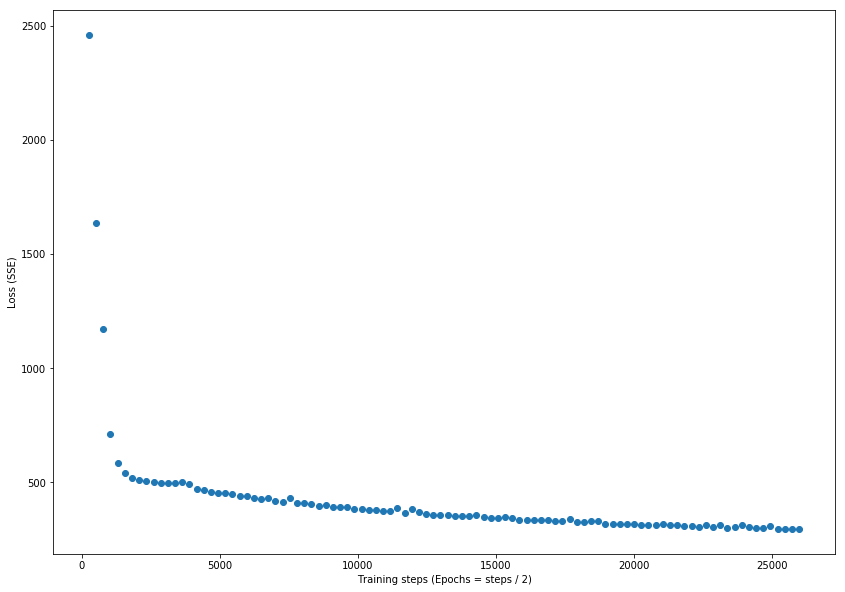

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [25]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-26000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.93
The Mean Absolute Error: 1.33 degrees Celcius
The Median Absolute Error: 1.09 degrees Celcius


In [52]:
print("temprature-count \t predicted")
for i in range(10):
    print(X_test.index[i],"\t",y_test[i],"\t\t",predictions[i])


temprature-count 	 predicted
2017-08-26 	 28 		 28.64173
2017-05-06 	 36 		 32.9329
2018-03-03 	 26 		 26.459944
2017-12-26 	 18 		 17.70695
2017-01-10 	 13 		 14.89978
2016-12-03 	 19 		 21.527987
2016-06-23 	 34 		 32.162914
2017-07-19 	 31 		 30.615353
2017-11-15 	 22 		 23.823896
2016-07-02 	 26 		 29.665443


In [58]:

    print(X_test.head(0))


Empty DataFrame
Columns: [meantempm_1, meantempm_2, meantempm_3, meandewptm_1, meandewptm_2, meandewptm_3, meanpressurem_1, meanpressurem_2, meanpressurem_3, maxhumidity_1, maxhumidity_2, maxhumidity_3, minhumidity_1, minhumidity_2, minhumidity_3, maxtempm_1, maxtempm_2, maxtempm_3, mintempm_1, mintempm_2, mintempm_3, maxdewptm_1, maxdewptm_2, maxdewptm_3, mindewptm_1, mindewptm_2, mindewptm_3, maxpressurem_1, maxpressurem_2, maxpressurem_3, minpressurem_1, minpressurem_2, minpressurem_3, precipm_1, precipm_2, precipm_3]
Index: []

[0 rows x 36 columns]
